In [1]:
""" Cualquier librería adicional que necesiteis durante el ejercicio, importadlo en esta sección """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.feature_selection import RFECV # RFE + Validacion Cruzada

# Ejercicio 2

Este ejercicio pretende poner en práctica la habilidad de limpiar datos y visualizar plots para crear finalmente modelos en __sklearn__.

El estudiante tendrá que repasar los comandos realizados en clase y lidiar con posibles errores durante el desarrollo. 

Para facilitar y agilizar el desarrollo, el estudiante tendrá que rellenar los huecos marcados como '_# codigo-alumno_'. No obstante, si además el estudiante necesita ejecutar código adicional, siempre podrá utilizar cualquier celda adicional. 

El estudiante tendrá siempre que introducir una semilla (seed) que generará acorde a su fecha de nacimiento (sin ser intrusivos en edad).

Finalmente, la entrega será un fichero .ipynb cambiando nombre y apellido al fichero.

In [2]:
""" El estudiante tendrá que utilizar la semilla proporcionada para todos los procesos aleatorios """

seed = 30 + 13 * 6

### Data cleaning

In [3]:
""" Leed el dataframe de sklearn llamado 'fetch_kddcup99' y almacenarlo en una variable llamada data """
from sklearn.datasets import fetch_kddcup99

data = fetch_kddcup99(as_frame = True) # as_frame = True esta disponible a partir de la version 0.24
pd_data = data.frame
pd_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1,0,0.11,0,0,0,0,0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1,0,0.05,0,0,0,0,0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1,0,0.03,0,0,0,0,0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1,0,0.03,0,0,0,0,0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1,0,0.02,0,0,0,0,0,b'normal.'


In [4]:
""" De entre todas las variables del dataframe, solo trabajaremos en 
    este ejercicio con las descritas en key_columns, por lo que tendréis que quitar el resto """

key_columns = ['duration', 'protocol_type', 'service', 'flag', 'logged_in', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate', 'labels']

pd_data = pd_data[key_columns]

pd_data.head()

,duration,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels
0,0,b'tcp',b'http',b'SF',1,8,8,0,9,0,b'normal.'
1,0,b'tcp',b'http',b'SF',1,8,8,0,19,0,b'normal.'
2,0,b'tcp',b'http',b'SF',1,8,8,0,29,0,b'normal.'
3,0,b'tcp',b'http',b'SF',1,6,6,0,39,0,b'normal.'
4,0,b'tcp',b'http',b'SF',1,6,6,0,49,0,b'normal.'


In [5]:
""" Comprobad que no haya nulos ni registros duplicados """

print(pd_data.isnull().sum()) # No hay valores nulos
print("###############################")
print("Total filas duplicadas: ", pd_data.duplicated().sum()) # Pero si filas duplicadas

duration                    0
protocol_type               0
service                     0
flag                        0
logged_in                   0
count                       0
srv_count                   0
serror_rate                 0
dst_host_srv_count          0
dst_host_srv_serror_rate    0
labels                      0
dtype: int64
###############################
Total filas duplicadas:  439856


In [6]:
pd_data = pd_data.drop_duplicates() # Eliminamos dichos duplicados
print("Total filas duplicadas: ", pd_data.duplicated().sum())

Total filas duplicadas:  0


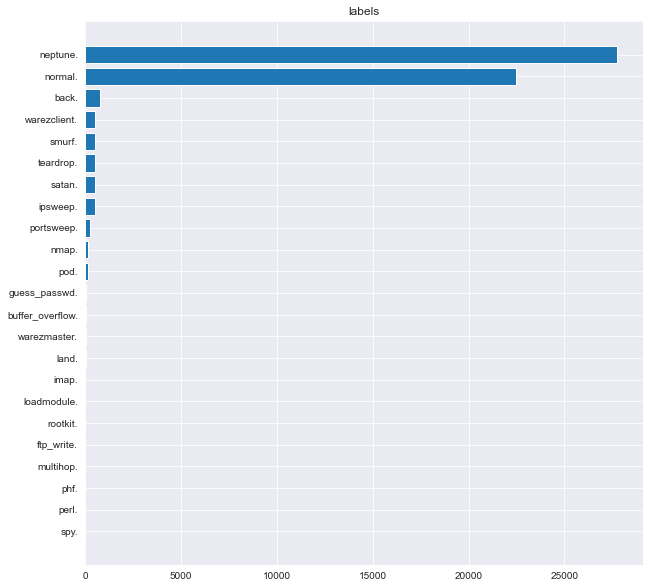

In [7]:
""" Mostrar un barplot para la variable objetivo (labels)"""

def mostrar_grafico_barras(columna):
    k = pd_data.groupby([columna]).size().sort_values()
    k.index = k.index.astype(str)
    fig = plt.figure(figsize=(10,10))
    plt.barh(k.index, k)
    plt.title(columna)
    plt.show()

target = 'labels' # Variable objetivo

mostrar_grafico_barras(target)

In [8]:
""" Dado que hay dos etiquetas que se repiten con mayor frecuencia, 
    transformad la variable labels para que tenga un valor booleano que indique 
    si es la etiqueta más frecuente o la segunda más frecuente, 
    los demás registros los eliminaremos de este estudio """

# Solo tenemos en cuenta los dos mas frecuentes
pd_data = pd_data[pd_data.labels.isin([b'normal.', b'neptune.'])]
print(len(pd_data))
pd_data.groupby(target).size().sort_values(ascending=False)

50177


labels
b'neptune.'    27722
b'normal.'     22455
dtype: int64

In [9]:
# 1 (True): es una conexion tipo neptune (mayor frecuencia)
# 0 (False): es una conexion normal (menor frecuencia)
pd_data[target] = pd_data.labels.apply(lambda x: 1 if x == b'neptune.' else 0)

print(len(pd_data))
pd_data.groupby(target).size().sort_values(ascending=False)

50177


labels
1    27722
0    22455
dtype: int64

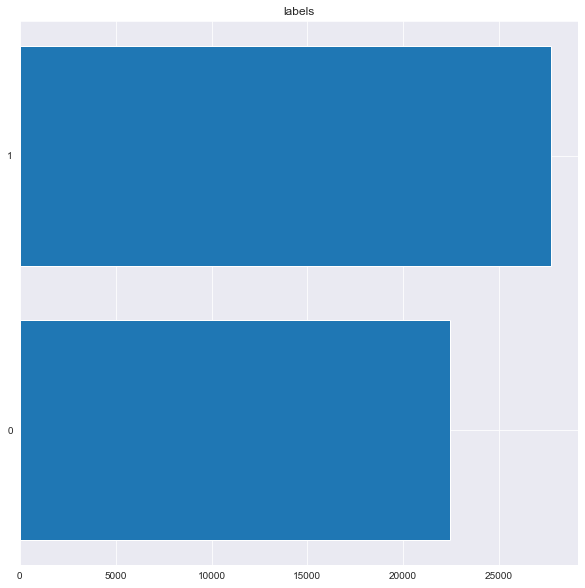

In [10]:
""" Volved a mostrar el barplot para la variable objetivo (labels) """
mostrar_grafico_barras(target)

In [11]:
""" Separaremos las variables categóricas de las numéricas """
num_cols = ['duration', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate']
cat_cols = ['protocol_type', 'service', 'flag', 'logged_in']

pd_data[num_cols] = pd_data[num_cols].astype(float)

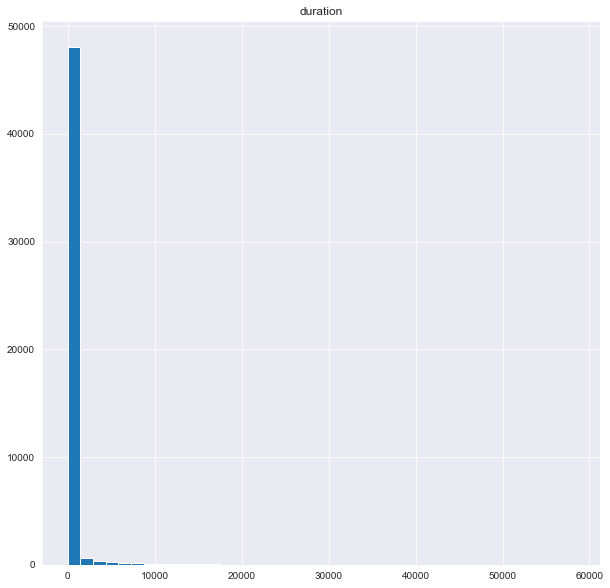

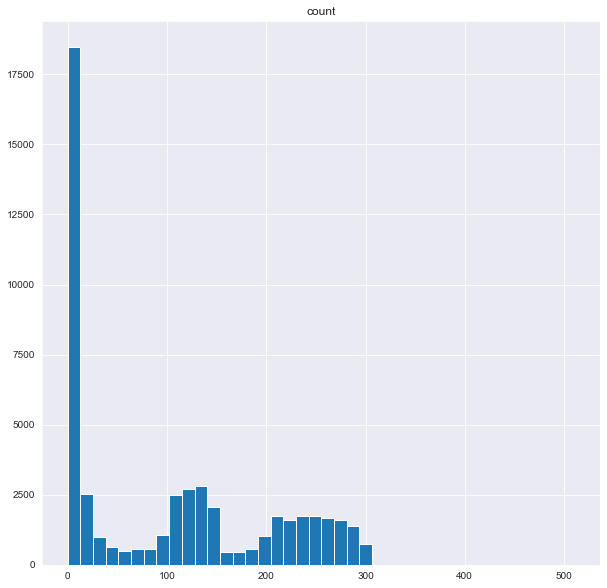

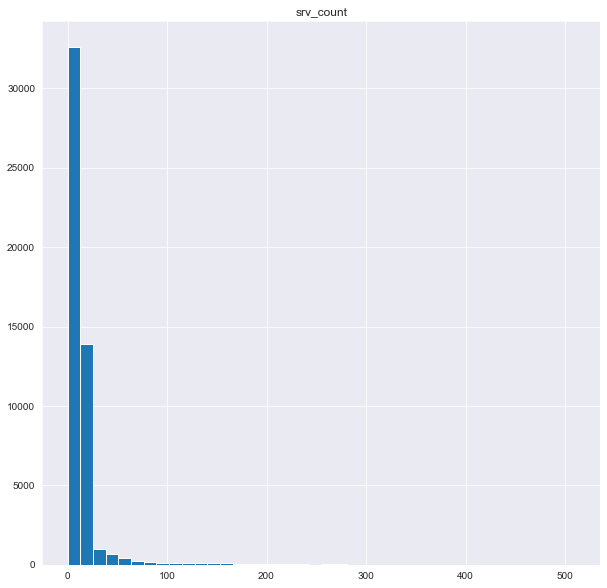

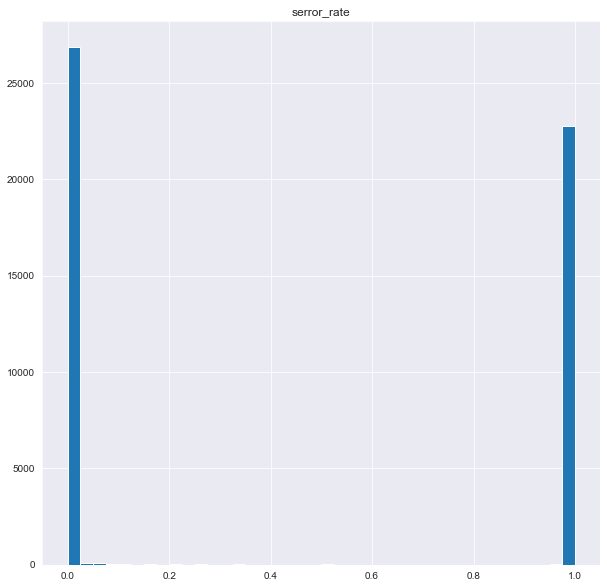

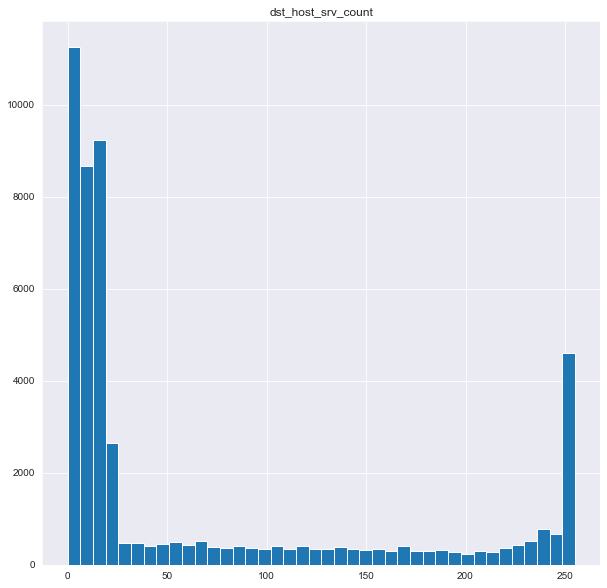

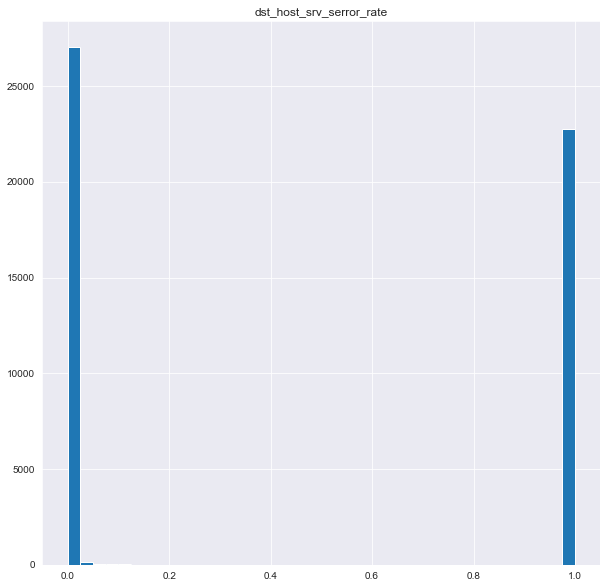

In [12]:
""" Mostrad un histograma por cada variable numérica """
for columna in num_cols:
    plt.figure(figsize=(10,10))
    plt.hist(pd_data[columna], bins = 40)
    plt.title(columna)
    plt.show()

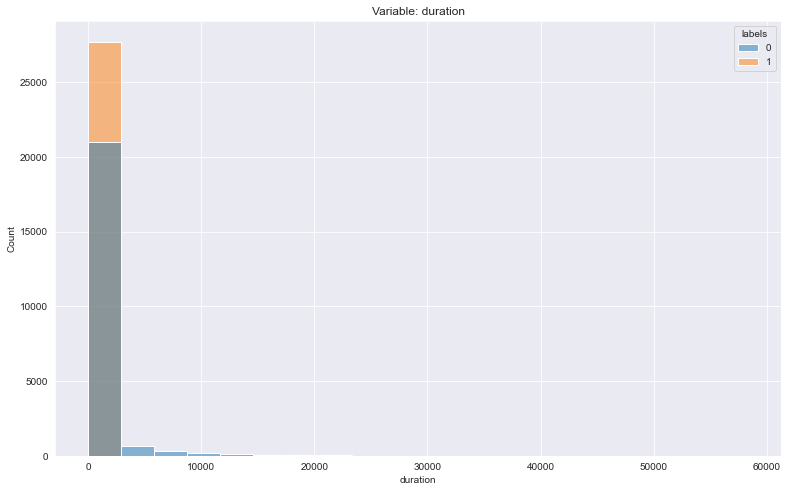

In [13]:
""" Por la forma de los histogramas, podría ser un buen estudio convertir las variables
    numéricas a variables dummy, es lo que hareis en este apartado y, por tanto, pasarán 
    a ser categóricas todas las variables del dataframe. Esta parte será libre para el 
    estudiante. Deberá tomar la decisión que considere más apropiada para realizar esta 
    binarización """
# Mapa de calor para los DataFrames
cm = sns.light_palette("blue", as_cmap=True)

pd.options.display.max_rows = 4000
labels_aux = pd_data.labels.apply(lambda x: "1" if x == 1 else "0")
# Funcion que permite agrupar el numero de filas por cada categoria Label
def agrupar_datos(columna):
    label_true = pd.DataFrame(pd_data[pd_data['labels'] == 1].groupby([columna]).size())
    label_false = pd.DataFrame(pd_data[pd_data['labels'] == 0].groupby([columna]).size())
    
    pd_data_concat = pd.concat([label_true, label_false], axis = 1)
    pd_data_concat.columns = ['1', '0']
    return pd_data_concat

def mostrar_histograma(columna):
    plt.figure(figsize=(13,8))
    sns.histplot(x=columna, data=pd_data, hue='labels', kde=False, bins=20)
    plt.title(str('Variable: ' + columna))
    plt.show()

# Comenzamos por la variables duration
mostrar_histograma('duration') 

En el caso de la variable _duration_ , dado que gran parte de los valores se agrupan en torno al valor de 0, tal y como podemos comprobar en la siguiente tabla, __se han decidido crear dos únicas categorías__:
1. _duration_ > 0
2. _duration_ >= 1, con un claro predominio de conexiones normales (0)

In [14]:
# duration 0; 1+
pd_data_concat = agrupar_datos('duration')

In [15]:
pd_data_concat.head(n = 100).style.background_gradient(cmap=cm)

,1,0
duration,,
0.0,27722.000000,15153
1.0,nan,1102
2.0,nan,567
3.0,nan,424
4.0,nan,287
5.0,nan,286
6.0,nan,136
7.0,nan,124
8.0,nan,92


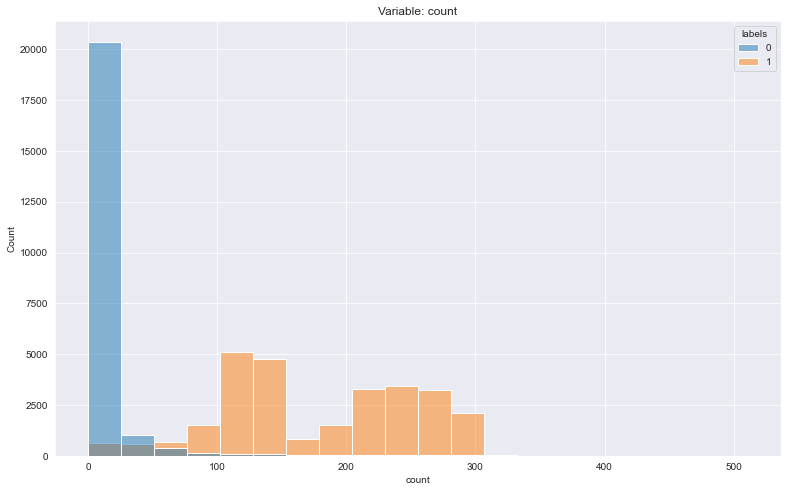

In [16]:
# count [0-24]; [25-200]; +200  
mostrar_histograma('count')

pd_data_concat = agrupar_datos('count')

En relación con la variable _count_ , nos encontramos (desde un punto de vista general), con tres grandes intervalos:

1. Durante los primeros valores, especialmente __entre los valores 0 y 24__, existe un mayor predominio de conexiones normales (label = 0) sobre conexiones Neptune (label = 1) en la variable objetivo.
2. __A partir del valor 25__, dicho predominio comienza a verse reducido, aumentando considerablemente de conexiones Neptune __hasta prácticamente el valor 200__.
3. Nuevamente, __a partir del valor 200__ el número de conexiones comienza nuevamente a aumentar hasta que el valor _count_ (o número de conexiones al mismo _host_ ) alcanza el valor 300, momento en el que desciende bruscamente.

In [17]:
pd_data_concat.style.background_gradient(cmap=cm)

,1,0
count,,
0.0,nan,1.000000
1.0,19.000000,9374.000000
2.0,14.000000,2794.000000
3.0,29.000000,1028.000000
4.0,17.000000,1057.000000
5.0,20.000000,783.000000
6.0,17.000000,679.000000
7.0,20.000000,567.000000
8.0,22.000000,463.000000


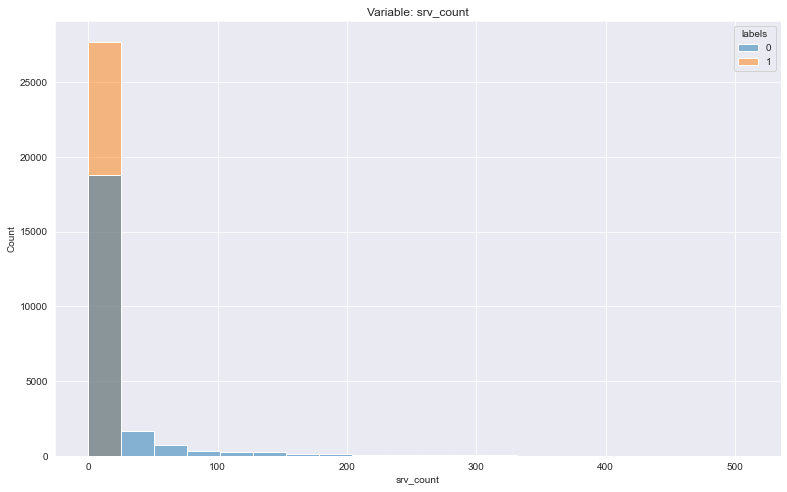

In [18]:
# srv_count [0-3]; [4-25]; +25
mostrar_histograma('srv_count')

pd_data_concat = agrupar_datos('srv_count')

En el caso de _srv_count_ o __número de conexiones al mismo servicio__ nos encontramos principalmente con tres intervalos, tal y como podemos comprobar en la tabla que se muestra a continuación:
1. __Entre 0 y 3 conexiones__ hay un mayor predominio de conexiones normales (0) sobre conexiones Neptune.
2. __A partir de 4__, dichas conexiones decrecen rápidamente, a diferencia de las conexiones de tipo Neptune, cuyo decrecimiento es mucho más atenuado, __hasta las 25 conexiones__.
3. __A partir de 26__, dichas conexiones prácticamente desaparecen.

In [19]:
pd_data_concat.style.background_gradient(cmap=cm)

,1,0
srv_count,,
0.0,nan,1
1.0,1302.000000,6383
2.0,1335.000000,3979
3.0,1350.000000,1556
4.0,1299.000000,993
5.0,1382.000000,639
6.0,1359.000000,596
7.0,1345.000000,471
8.0,1396.000000,422


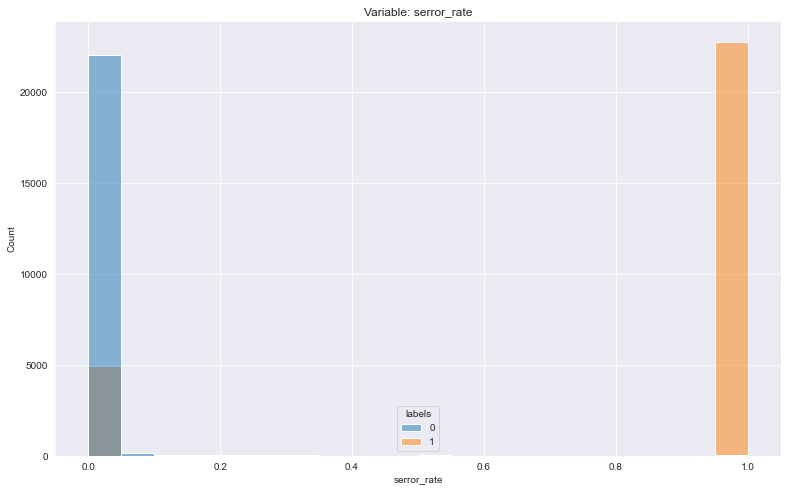

In [20]:
# serror_rate [0-0.5] ; (0.5 - 1)
mostrar_histograma('serror_rate')

pd_data_concat = agrupar_datos('serror_rate')

En relación con _serror_rate_ (y pese a que la gráfica sólo muestre valores en 0 y 1), analizando la tabla resultante podemos dividir el dominio en dos posibles intervalos:
1. __Entre 0 y 0.5__, intervalo en el que predomina las conexiones de tipo 0.

2. __A partir de 0.5__, donde comienza a destacar las conexiones de tipo 1.

In [21]:
pd_data_concat.style.background_gradient(cmap=cm)

,1,0
serror_rate,,
0.0,4916.000000,21936.000000
0.01,nan,1.000000
0.02,nan,11.000000
0.03,nan,35.000000
0.04,nan,36.000000
0.05,nan,34.000000
0.06,nan,43.000000
0.07,nan,34.000000
0.08,nan,33.000000


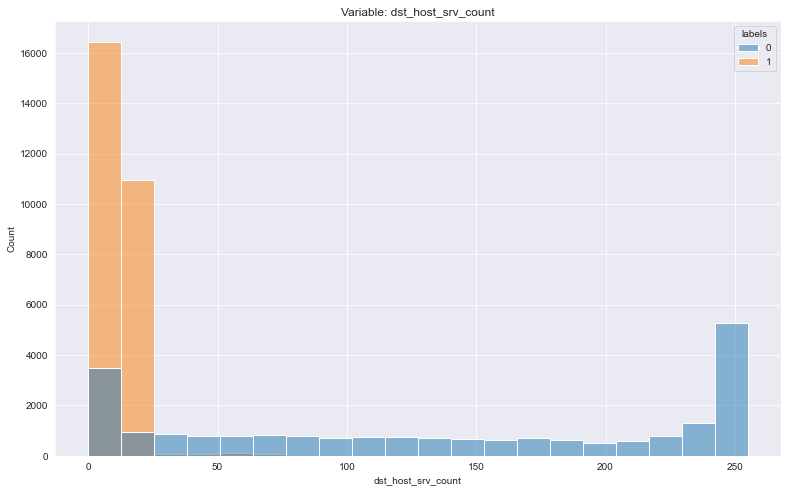

In [22]:
# dst_host_srv_count [0-2]; [3-25]; [26-70] +70
mostrar_histograma('dst_host_srv_count')

pd_data_concat = agrupar_datos('dst_host_srv_count')

A continuación, nos encontramos con la variable _dst_host_srv_count_ o número total de conexiones al mismo número de puerto , el cual se ha dividido en un total de cuatro intervalos:
1. __Entre 0 y 2__, ya que entre dichos valores (como podemos comprobar en la siguiente tabla) se concentra una mayor proporción entre ambos tipos de conexiones:

In [23]:
pd_data_concat.head(n = 3)

,1,0
dst_host_srv_count,,
0.0,NaN,2
1.0,1369.0,1261
2.0,1430.0,1065


2. __Entre 3 y 25__, el número de conexiones normales decrece significativamente, mientras que las conexiones Neptune decrecen con mayor lentitud.
3. __Entre 26 y 70 conexiones, aproximadamente__, se produce un decrecimiento abrupto en las conexiones Neptune. A modo de ejemplo, y como podemos observar en la siguiente tabla, a partir de 26 el valor decrece de 208 a tan solo 12.
4. __A partir de 71 conexiones__, las conexiones Neptune son prácticamente inexistentes (NaN).

In [24]:
pd_data_concat.style.background_gradient(cmap=cm)

,1,0
dst_host_srv_count,,
0.0,nan,2
1.0,1369.000000,1261
2.0,1430.000000,1065
3.0,1380.000000,347
4.0,1342.000000,154
5.0,1377.000000,98
6.0,1347.000000,84
7.0,1359.000000,69
8.0,1379.000000,72


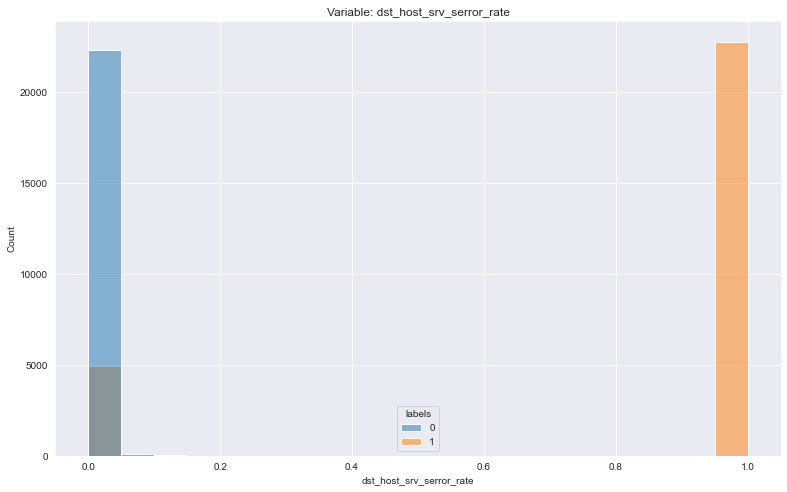

In [25]:
# dst_host_srv_serror_rate [0-1) 1
mostrar_histograma('dst_host_srv_serror_rate')

pd_data_concat = agrupar_datos('dst_host_srv_serror_rate')

Del mismo modo que sucedía con _serror_rate_ , la variable _dst_host_srv_serror_rate_ (ratio de error de conexión en el servidor), dado el contraste significativo entre ambos tipos de conexiones, podemos dividir su dominio en dos posibles intervalos: 
1. __Entre un ratio de 0 y 1 (no inclusive)__, existe un claro predominio de conexiones "normales", en especial durante los primeros valores (entre 0 y 0.03, principalmente).
2. Por el contrario, __cuando el ratio de error de conexión alcanza el 100 % (1)__, la proporción es totalmente opuesta: amplio predominio de conexiones Neptune (22749 frente a 4).

In [26]:
pd_data_concat.style.background_gradient(cmap=cm)

,1,0
dst_host_srv_serror_rate,,
0.0,4916.000000,19816.000000
0.01,1.000000,1858.000000
0.02,nan,451.000000
0.03,nan,109.000000
0.04,nan,61.000000
0.05,nan,27.000000
0.06,nan,21.000000
0.07,nan,8.000000
0.08,1.000000,9.000000


In [27]:
# Codificamos las variables a categoricas, en base a los intervalos acordados
# Comenzamos con las categorias binarias...
# duration: 0 1+
pd_data['duration'] = pd_data['duration'].apply(lambda x: 1 if x>=1 else 0)

# serror_rate: [0-0.5] ; (0.5 - 1)
pd_data['serror_rate'] = pd_data['serror_rate'].apply(lambda x: 1 if x>0.5 else 0)

# dst_host_srv_serror_rate: [0-1); 1
pd_data['dst_host_srv_serror_rate'] = pd_data['dst_host_srv_serror_rate'].apply(lambda x: 1 if x==1 else 0)

# ...Con mas de dos categorias...
# count: [0-24]; [25-200); +200
pd_data['count'] = pd_data['count'].apply(lambda x: "[0-24]" if x<=24 else "[25-200]" if x<=200 else "+200")

# srv_count: [0-3]; [4-25]; +25
pd_data['srv_count'] = pd_data['srv_count'].apply(lambda x: "[0-3]" if x<=3 else "[4-25]" if x<=25 else "+25")

# dst_host_srv_count: [0-2]; [3-25]; [26-70] +70
pd_data['dst_host_srv_count'] = pd_data['dst_host_srv_count'].apply(lambda x: "[0-2]" if x<= 2 else "[3-25]" if x<=25 else "[26-70]" if x<=70 else "+70")

In [28]:
# Mostramos el reparto de valores True/False en cada categoria
for columna in num_cols:
    display(pd.DataFrame(pd_data.groupby([columna, 'labels']).size(), columns=['']))

duration labels       
0        0       15153
         1       27722
1        0        7302

count    labels       
+200     0         195
         1       12629
[0-24]   0       20291
         1         588
[25-200] 0        1969
         1       14505

srv_count labels       
+25       0        3635
          1           3
[0-3]     0       11919
          1        3987
[4-25]    0        6901
          1       23732

serror_rate labels       
0           0       22413
            1        4917
1           0          42
            1       22805

dst_host_srv_count labels       
+70                0       15139
                   1          17
[0-2]              0        2328
                   1        2799
[26-70]            0        2891
                   1         320
[3-25]             0        2097
                   1       24586

dst_host_srv_serror_rate labels       
0                        0       22451
                         1        4973
1                        0           4
                         1       22749

In [29]:
# Por ultimo, codificamos las variables a formato dummy (solo las que tengan mas de dos categorias)
pd_data = pd.get_dummies(pd_data, columns=['count', 'srv_count', 'dst_host_srv_count'])
# Eliminamos, de cada variable dummy, aquellas con un menor "desbalanceo" entre conexiones 0/1, 
# en lugar de simplemente descartar la primera categoria con drop_first = True
pd_data = pd_data.drop(['count_[25-200]', 'srv_count_[0-3]', 'dst_host_srv_count_[0-2]'], axis = 1)

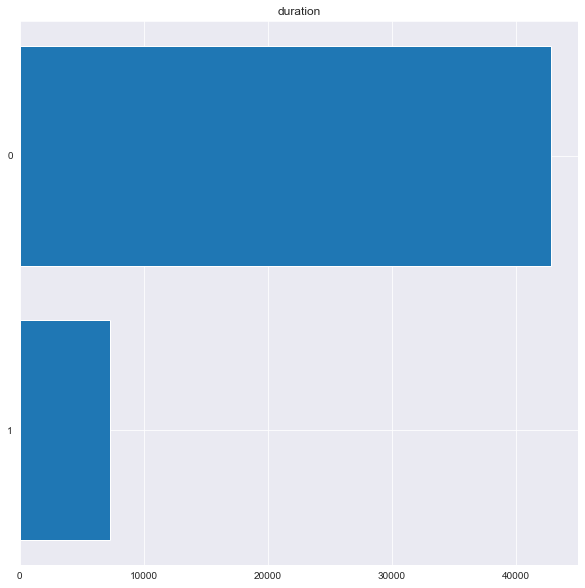

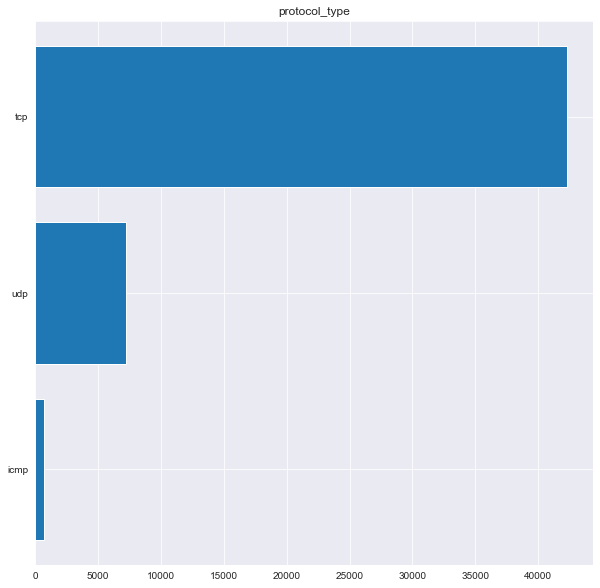

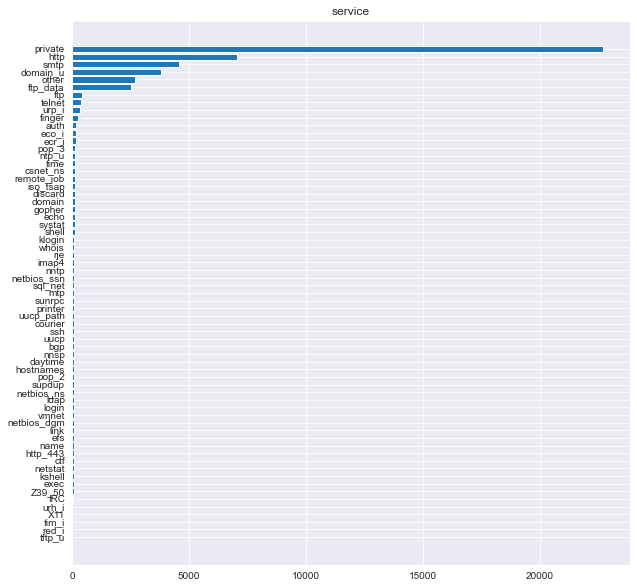

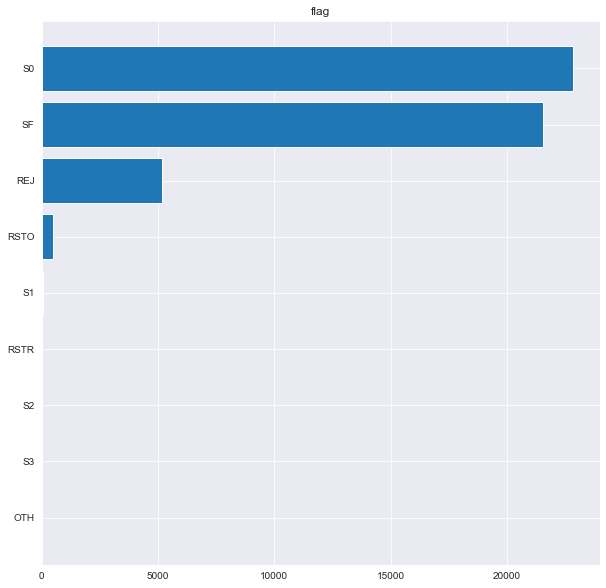

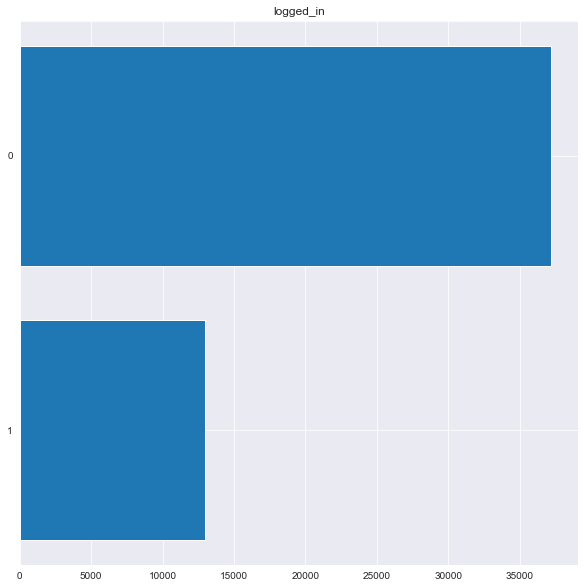

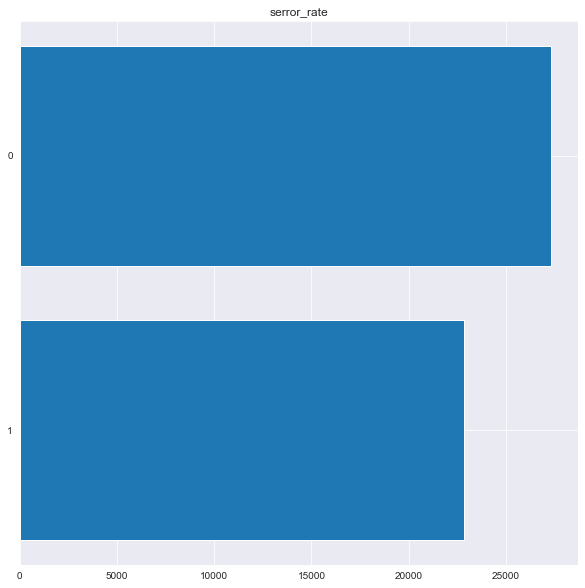

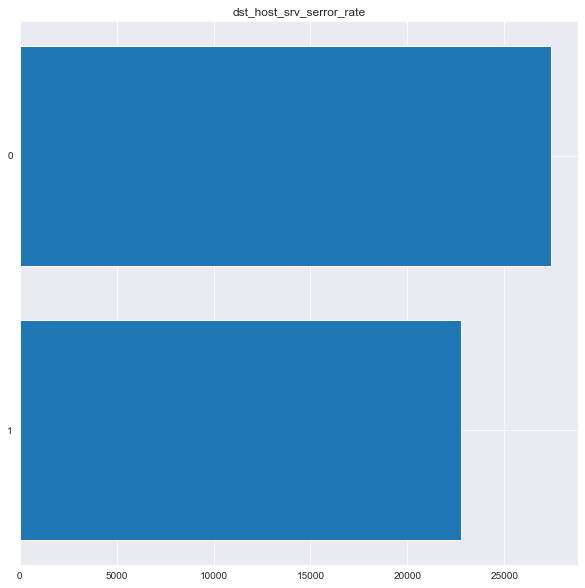

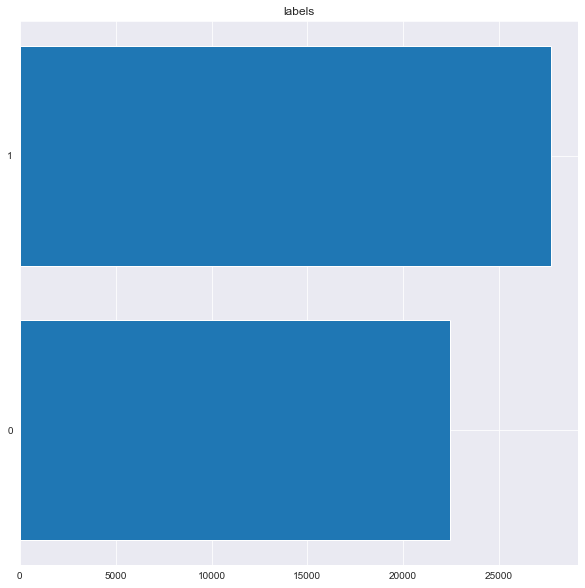

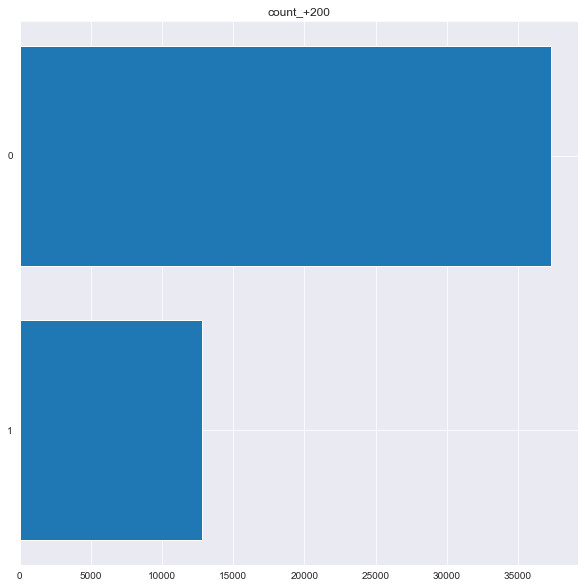

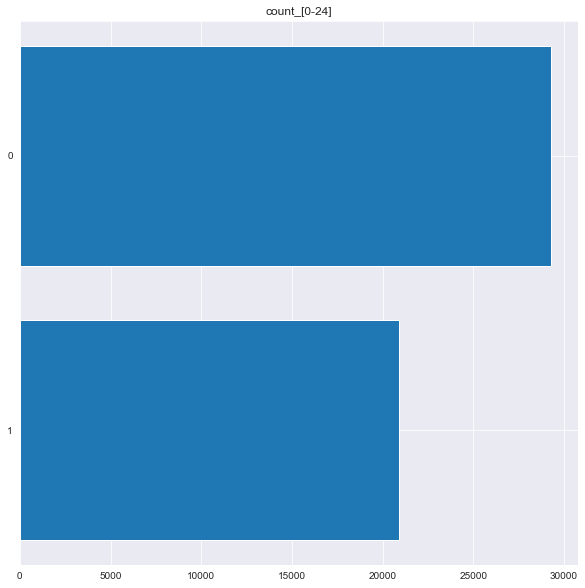

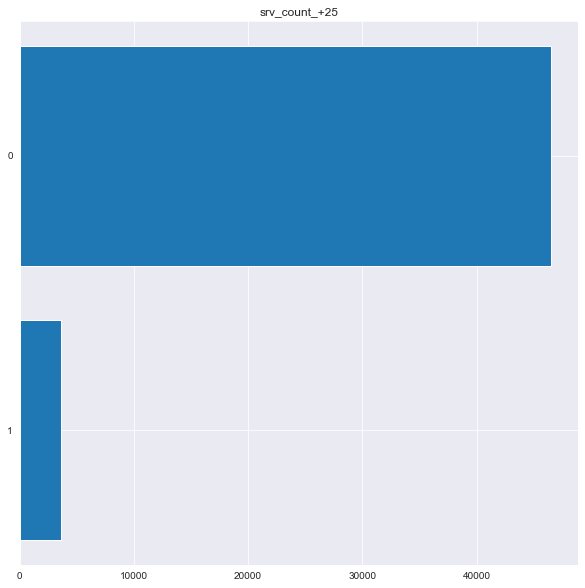

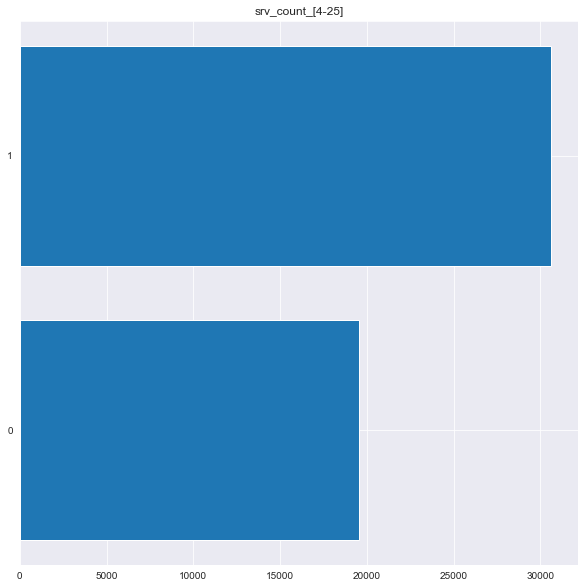

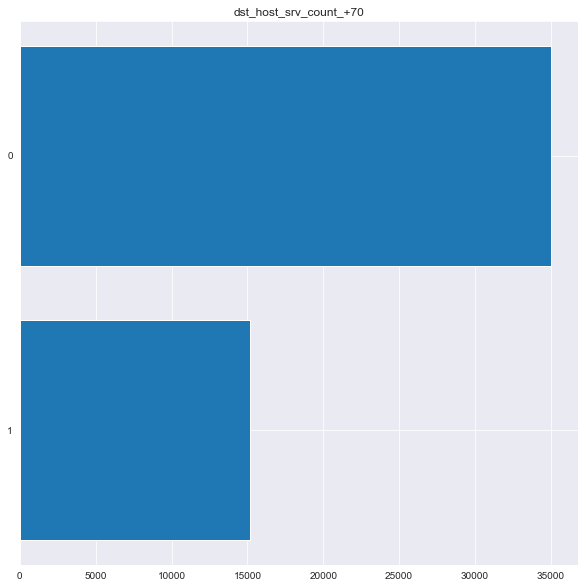

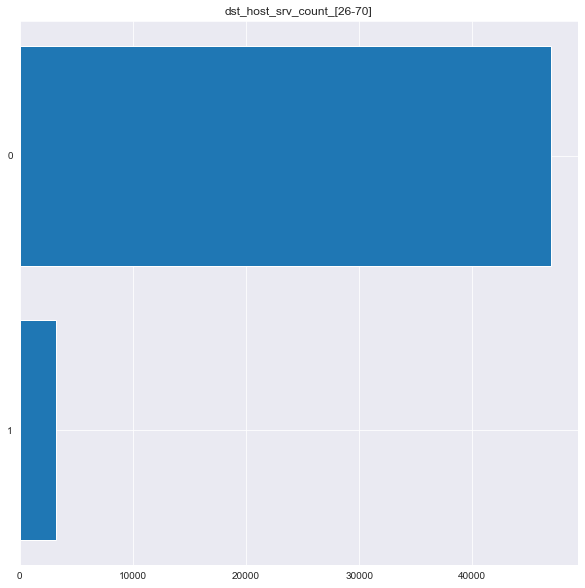

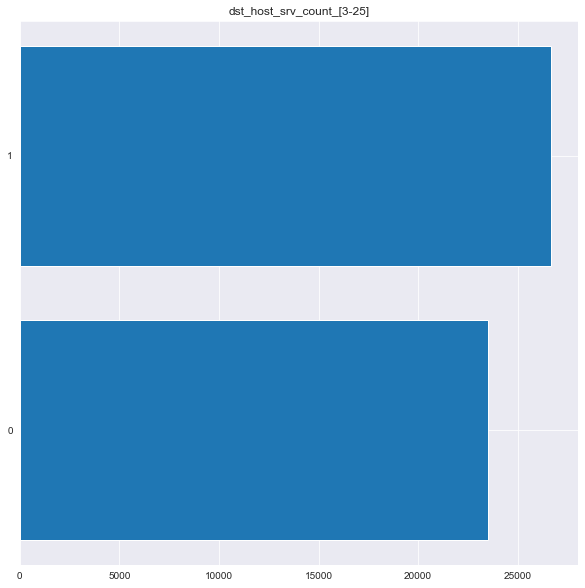

In [30]:
""" Mostrad un barplot por cada variable """
cols = pd_data.columns
for col in cols:
    mostrar_grafico_barras(col)

In [31]:
""" Transformad la variable service en una variable dummy que nos permitan identificar el servicio
    más frecuente frente al resto """
# Servicio mas frecuente: private
pd_data['service'] = pd_data['service'].apply(lambda x: 1 if x == b'private' else 0)
pd_data.groupby('service').size().sort_values(ascending=False)

service
0    27462
1    22715
dtype: int64

In [32]:
""" Transformad la variable flag en dos variables dummy que nos permitan identificar 3 tipos de flags, 
    los dos más comunes y el resto """
# Flags mas comunes: S0 y SF
pd_data['flag'] = pd_data['flag'].apply(lambda x: 'S0' if x == b'S0' else 'SF' if x == b'SF' else 'Others')
pd_data.groupby('flag').size().sort_values(ascending=False)

flag
S0        22846
SF        21553
Others     5778
dtype: int64

In [33]:
for columna in ['service', 'flag']:
    display(pd.DataFrame(pd_data.groupby([columna, 'labels']).size(), columns=['']))

service labels       
0       0       21691
        1        5771
1       0         764
        1       21951

flag   labels       
Others 0         862
       1        4916
S0     0          40
       1       22806
SF     0       21553

In [34]:
# Others no es la categoria mas discriminatoria, por lo que la eliminamos (con drop_first = True)
pd_data = pd.get_dummies(pd_data, columns=['flag'], drop_first=True)

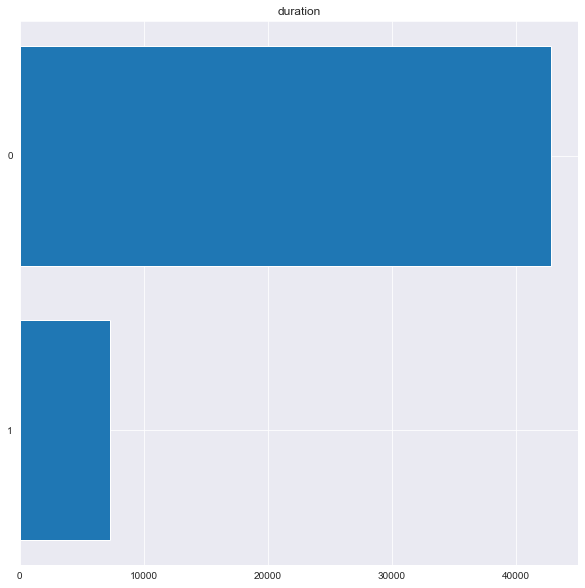

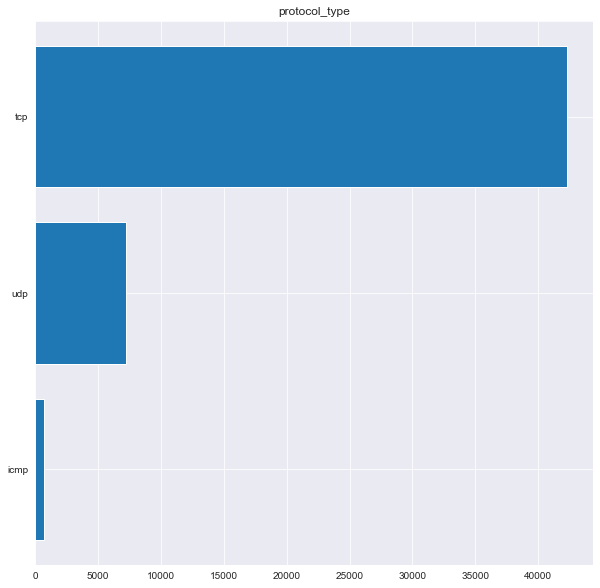

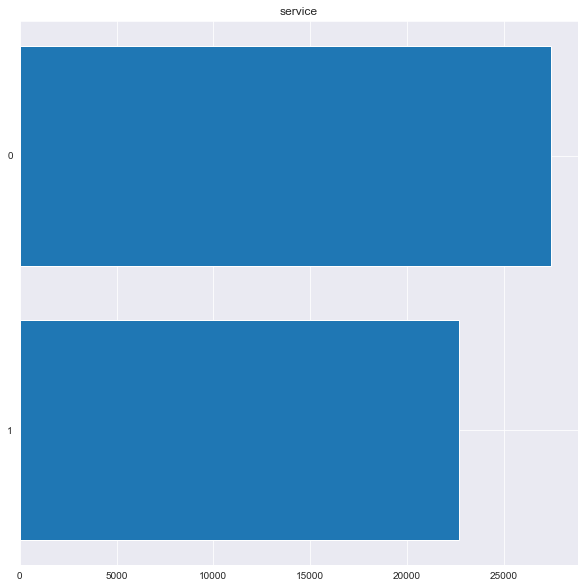

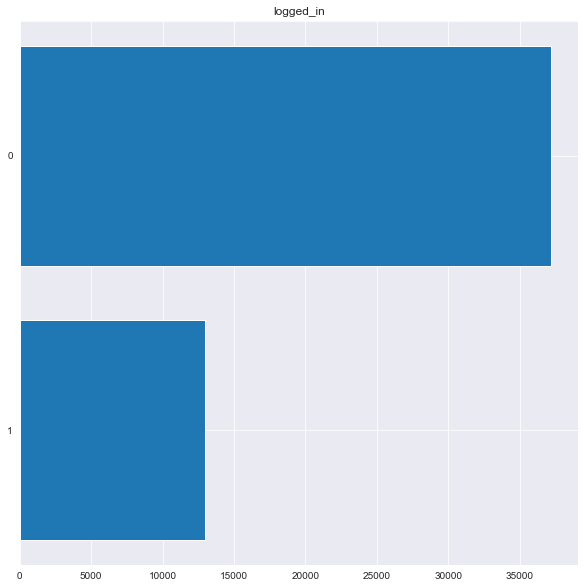

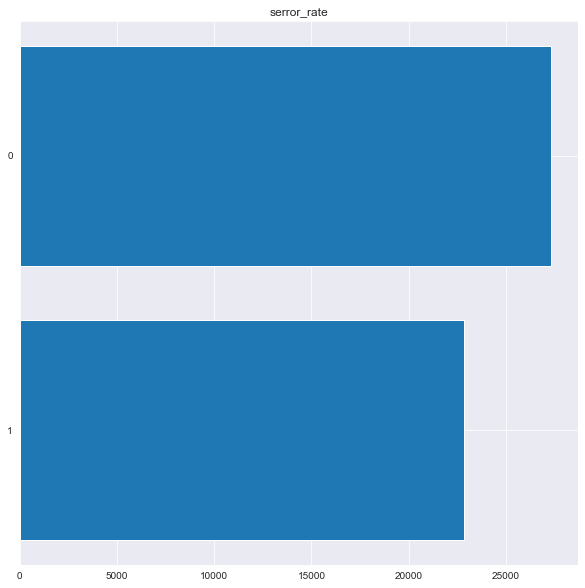

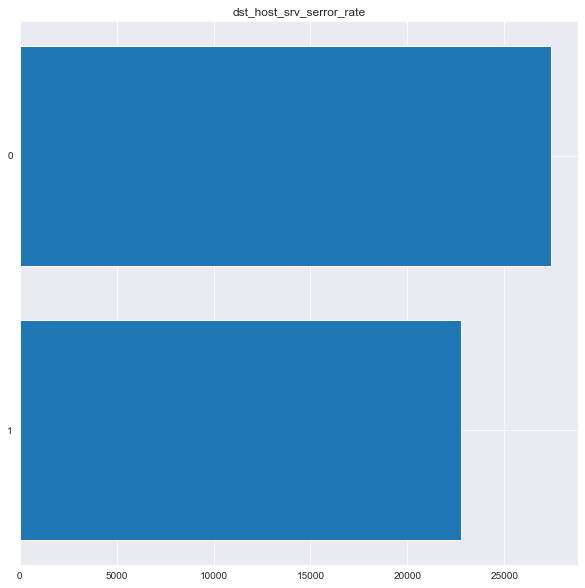

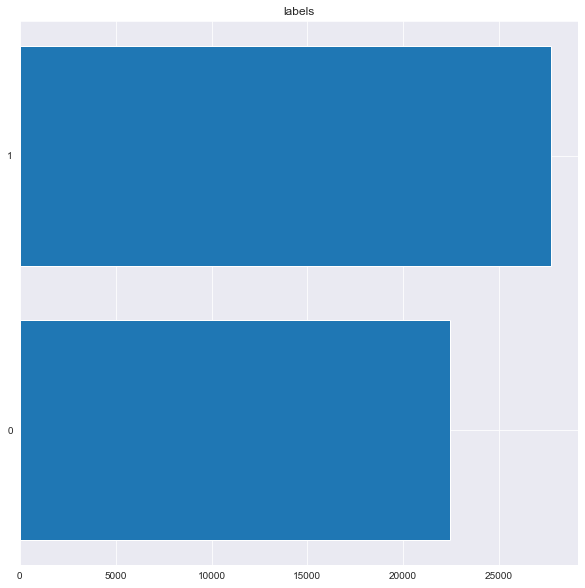

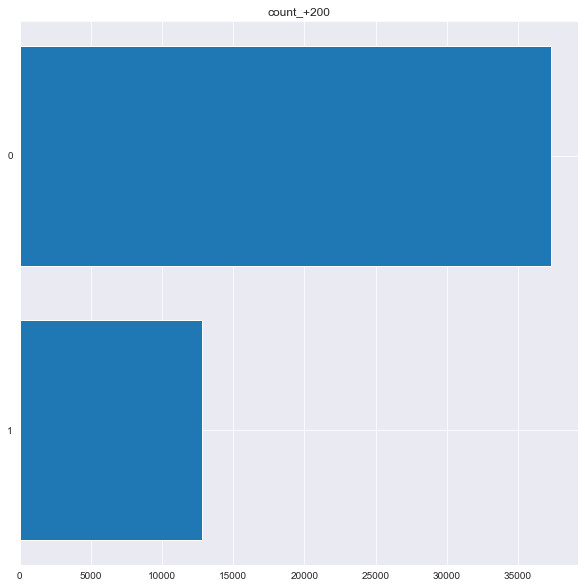

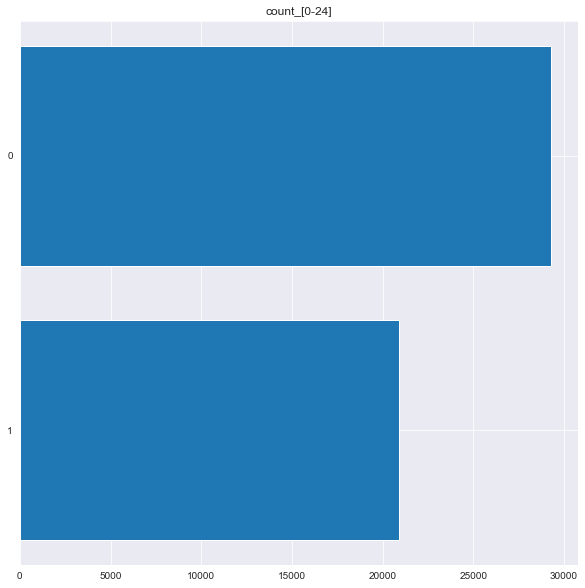

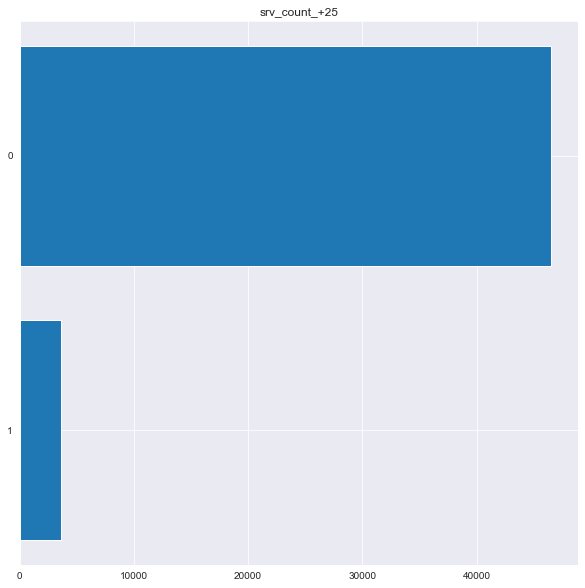

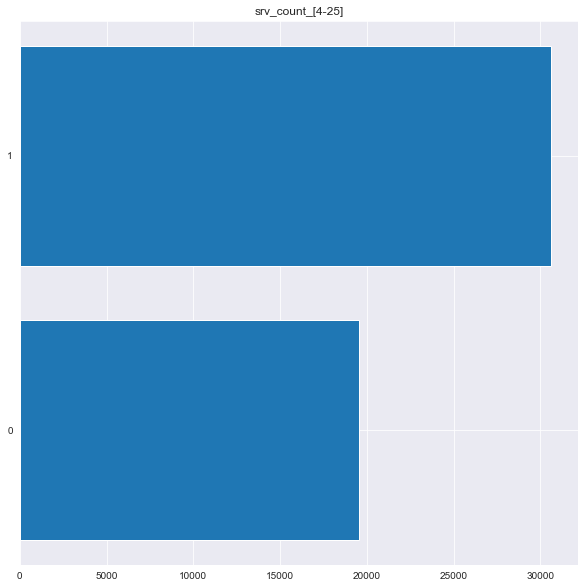

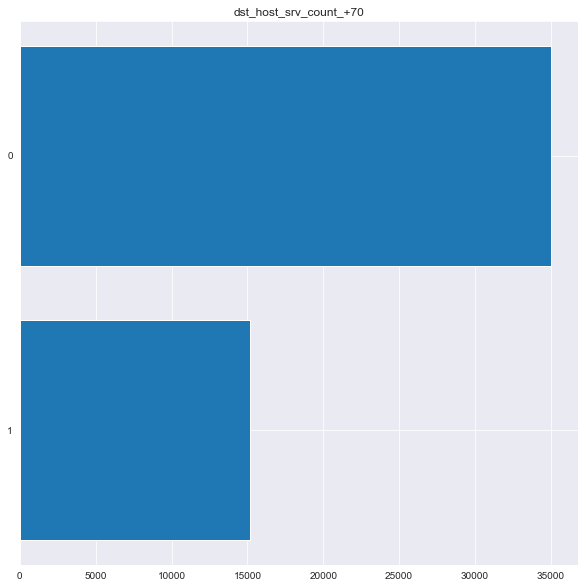

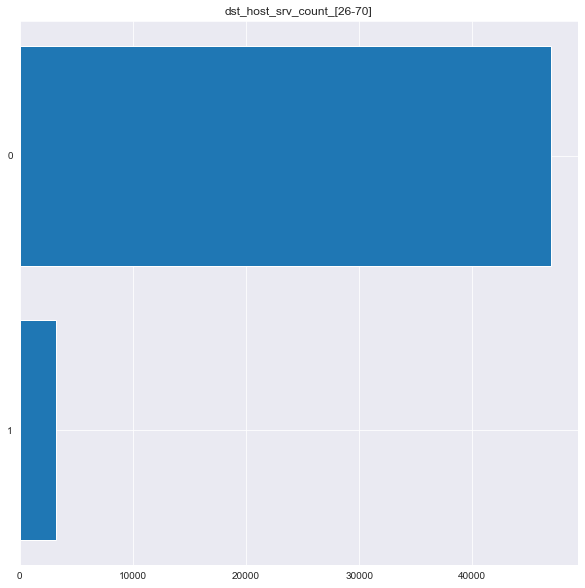

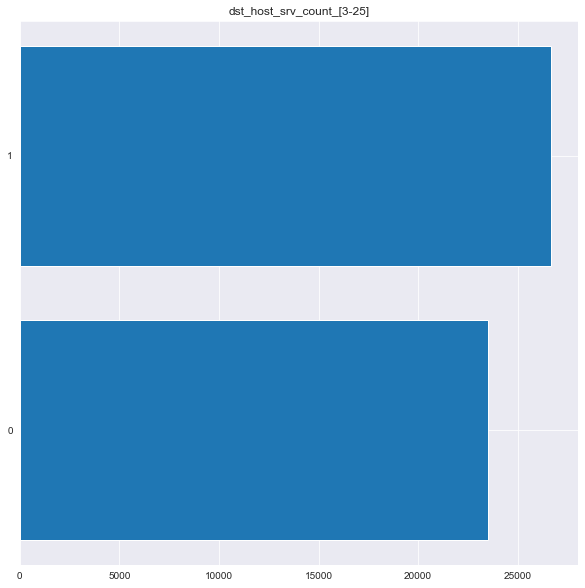

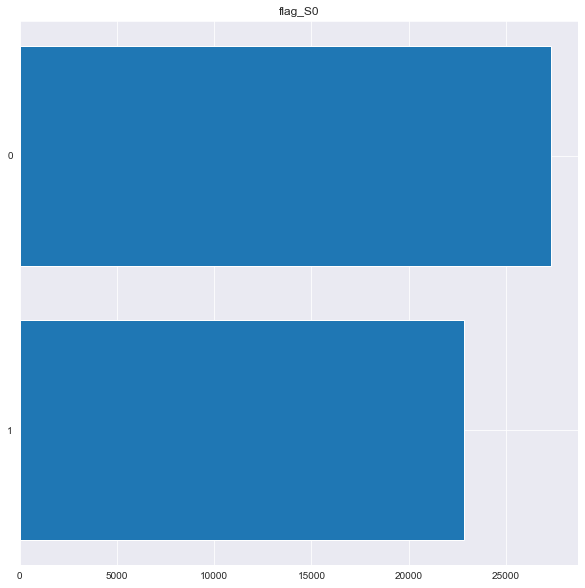

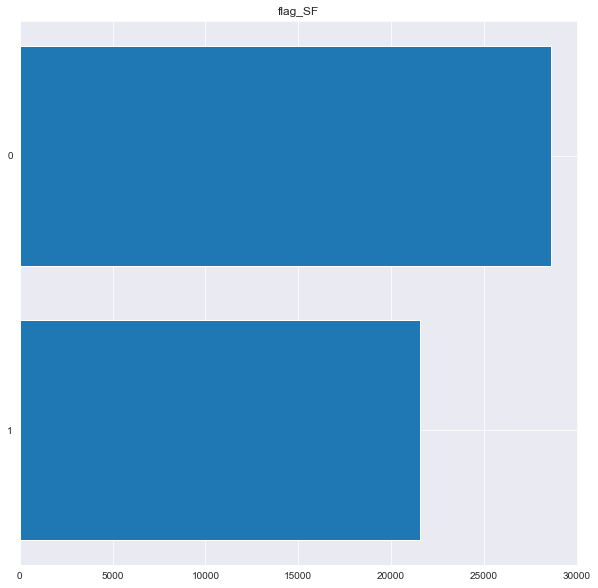

In [35]:
pd_data.logged_in = pd_data.logged_in.astype(int)
""" Volved a mostrad un barplot por cada variable """
cols = pd_data.columns
for col in cols:
    mostrar_grafico_barras(col)

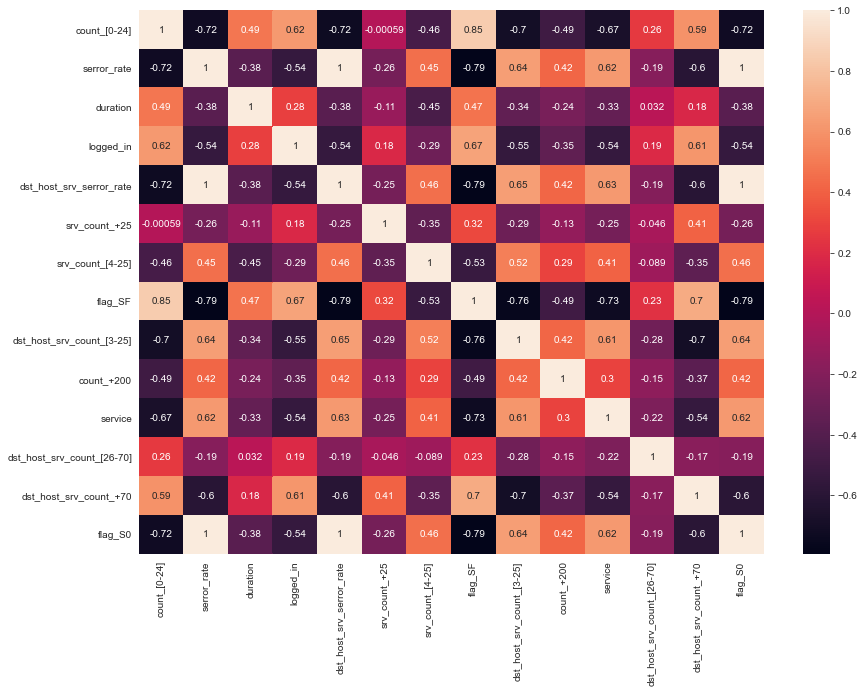

In [36]:
""" Mostrad un plot de correlaciones entre variables numéricas """
num_cols = list(set(pd_data.columns) - {'labels', 'protocol_type'}) # Salvo la variable objetivo y protocol_type
plt.figure(figsize=(14,10))
sns.heatmap(pd_data[num_cols].corr(), annot=True)
plt.show()

### Model evaluation

In [37]:
""" Realizad una evaluación de, al menos, cinco modelos de machine learning con
    la técnica de validación cruzada más acertada (10 splits). Además, se pide
    incorporar, al menos, una técnica de selección previa de las 1, 2 o 3 features que
    mejores resultados ofrezca (Nota, tendreis que usar OneHotEncoder para las variables 
    que tengan strings) """

X = pd_data.drop(target, axis=1) 
y = pd_data[target]
X.shape

(50177, 15)

In [38]:
# En primer lugar, debemos usar OneHotEncoder para la variable protocol_type
# Previamente, hay decodificar sus categorias, dado que se encuentran en formato UTF-8
X['protocol_type'] = X['protocol_type'].apply(lambda x: x.decode("utf-8"))

pd.DataFrame(X.groupby('protocol_type').size(), columns=[''])

,
protocol_type,
icmp,651
tcp,42280
udp,7246


In [39]:
enc_protocol_type = OneHotEncoder(drop = 'first')
protocol_type = X[['protocol_type']]
X_enc = enc_protocol_type.fit_transform(protocol_type)

feature_labels = enc_protocol_type.get_feature_names()

X_protocol_type = pd.DataFrame.sparse.from_spmatrix(X_enc, columns=feature_labels, index=X.index)
X = X.drop(columns=['protocol_type'])
X = pd.concat([X, X_protocol_type], axis=1)

In [40]:
X.head()

,duration,service,logged_in,serror_rate,dst_host_srv_serror_rate,count_+200,count_[0-24],srv_count_+25,srv_count_[4-25],dst_host_srv_count_+70,dst_host_srv_count_[26-70],dst_host_srv_count_[3-25],flag_S0,flag_SF,x0_tcp,x0_udp
0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1.0,0.0
1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1.0,0.0
2,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1.0,0.0
3,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1.0,0.0
4,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1.0,0.0


In [41]:
# SELECCION DE VARIABLES
# 1. TEST CHI-2
test_chi2 = SelectKBest(score_func=chi2, k=3)
fit = test_chi2.fit(X, y)

In [42]:
chi2_results = pd.DataFrame(zip(X.columns, fit.pvalues_, fit.scores_), columns=['feature', 'pval', 'score'])
chi2_results.sort_values('score', ascending = False).head(n=10)

,feature,pval,score
13,flag_SF,0.0,26608.428680
6,count_[0-24],0.0,23215.471988
9,dst_host_srv_count_+70,0.0,18635.063273
4,dst_host_srv_serror_rate,0.0,18415.600528
12,flag_S0,0.0,18360.891078
3,serror_rate,0.0,18354.490079
2,logged_in,0.0,15994.933511
1,service,0.0,15737.538720
11,dst_host_srv_count_[3-25],0.0,14688.787921
5,count_+200,0.0,9693.613448


In [43]:
# Aparentemente, flag_SF, count_[0-24] y dst_host_srv_count_+70 parecen ser relevantes
# No obstante, ¿Que porcentaje de varianza logran explicar las componentes PCA?
pca = PCA()
fit = pca.fit(X)

# Como podemos observar, salvo el primer autovalor, el resto no suponen ni siquiera una variable
# A simple vista, tan solo la primera componente parece ser la mas relevante (con cerca de dos variables)
pca_data = list(zip(np.cumsum(fit.explained_variance_ratio_), pca.explained_variance_.T))
pca_statistics = pd.DataFrame(pca_data, columns=["Explained Variance (%)", "Eigenvalues"])
pca_statistics.head(n=10)

,Explained Variance (%),Eigenvalues
0,0.573627,1.759148
1,0.672459,0.303089
2,0.738583,0.202782
3,0.790692,0.159803
4,0.840431,0.152536
5,0.886900,0.142506
6,0.919671,0.100500
7,0.947792,0.086238
8,0.965760,0.055104
9,0.983454,0.054262


SelectKBest. Chosen variables with 1 features: 
      Importance Variable
13  21280.735137  flag_SF 

RFE. Chosen variables with  1 features:  ['flag_SF']
###############################################################################

SelectKBest. Chosen variables with 2 features: 
      Importance      Variable
13  21280.735137       flag_SF
6   18626.881293  count_[0-24] 

RFE. Chosen variables with  2 features:  ['count_[0-24]', 'flag_SF']
###############################################################################

SelectKBest. Chosen variables with 3 features: 
      Importance                Variable
13  21280.735137                 flag_SF
6   18626.881293            count_[0-24]
9   14901.171447  dst_host_srv_count_+70 

RFE. Chosen variables with  3 features:  ['count_[0-24]', 'flag_S0', 'flag_SF']
###############################################################################



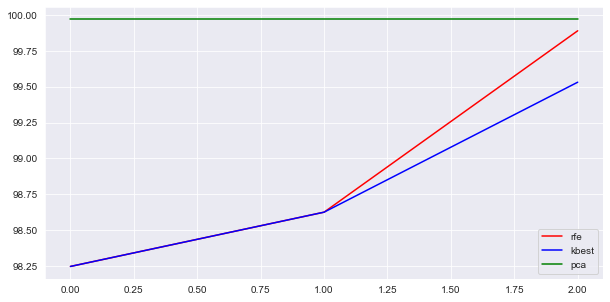

In [44]:
# A continuacion, aplicamos los metodos SelectKBest, RFE y PCA con el proposito de estudiar la mejor seleccion
# de variables: 1, 2 o 3.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

algorithm = RandomForestClassifier(random_state=seed)

accuracies_rfe = []
accuracies_kbest = []
accuracies_pca = []

for k in range(1, 4):
    selector1 = SelectKBest(score_func=chi2, k=k)
    model1 = make_pipeline(selector1, algorithm)
    model1.fit(X_train, Y_train)
    feature_list_aux = zip(selector1.scores_, X.columns)
    
    print("SelectKBest. Chosen variables with", k, "features: ")
    print(pd.DataFrame(feature_list_aux, columns = ['Importance', 'Variable']).sort_values('Importance',ascending=False).head(n = k), "\n")
    result = model1.score(X_test, Y_test)
    accuracies_kbest.append(result*100)
    
    selector2 = RFE(algorithm, n_features_to_select=k)
    model2 = make_pipeline(selector2, algorithm)
    model2.fit(X_train, Y_train)
    print("RFE. Chosen variables with ", k, "features: ", list(X.columns[selector2.support_]))
    result = model2.score(X_test, Y_test)
    accuracies_rfe.append(result*100)
    
    print("###############################################################################\n")
    
    selector3 = PCA(n_components=k)
    model3 = make_pipeline(selector3, algorithm)
    model3.fit(X_train, Y_train)
    result = model3.score(X_test, Y_test)
    accuracies_pca.append(result*100)
    
plt.figure(figsize=(10,5))
plt.plot(accuracies_rfe, '-', color="red", label="rfe")
plt.plot(accuracies_kbest, '-', color="blue", label="kbest")
plt.plot(accuracies_pca, '-', color="green", label="pca")
plt.legend()
plt.show()

Analizando la gráfica resultante, __llama la atención la elevada precisión de la primera componente__, con un valor muy cercano al 100 %, a diferencia de los resultados obtenidos con RFE o KBest, donde para alcanzar un 99 % de precisión se requieren 3 variables.

Por otro lado, también podemos emplear el método RFECV, es decir, aplicar _Recursive Feature Elimination_ con validación cruzada. De este modo, podremos comprobar qué variable o variables son más importantes al realizar múltiples selecciones. En relación con el método de validación cruzada, se ha elegido el método _KFold_ por los siguientes motivos:

1. __ShuffleSplit__: a diferencia de _KFold_ , aunque computacionalmente es un método de validación cruzada menos costoso, _ShuffleSplit_ no garantiza que una observación aparezca k-1 veces en un grupo de entrenamiento y al menos una vez en un grupo o _fold_ de prueba.
2. __LeaveOneOut__: computacionalmente es mucho más costoso (sobretodo con el número de observaciones de las que disponemos: 50177), dado que el número de iteraciones que se deben realizar es de N (número de muestras), donde se analiza en cada una tanto los datos de entrenamiento como de prueba.
3. __StratifiedKFold__: sería un método adecuado cuando las clases de la variable objetivo se encuentran desbalanceadas. En este caso, ambas clases están bastante equilibradas:

In [45]:
pd.DataFrame(y).groupby('labels').size()

labels
0    22455
1    27722
dtype: int64

In [50]:
cv_technique = KFold(n_splits = 10, shuffle = True, random_state = seed)
rfe_cv = RFECV(algorithm, cv = cv_technique, scoring = 'accuracy')
rfe_cv = rfe_cv.fit(X, y)

In [51]:
feature_list = zip(rfe_cv.ranking_, rfe_cv.support_, X.columns)
pd.DataFrame(feature_list, columns = ['Ranking', 'Importance', 'Variable']).sort_values('Ranking')

,Ranking,Importance,Variable
1,1,True,service
3,1,True,serror_rate
4,1,True,dst_host_srv_serror_rate
6,1,True,count_[0-24]
7,1,True,srv_count_+25
9,1,True,dst_host_srv_count_+70
11,1,True,dst_host_srv_count_[3-25]
12,1,True,flag_S0
13,1,True,flag_SF
15,2,False,x0_udp


Como podemos observar en la tabla resultante, RFECV considera como "importantes" un total de 9 variables, entre las que se incluyen _flag_SF_ , _count[0-24]_ , _dst_host_srv_count_+70_ y _dst_host_srv_serror_rate_1_; un número de variables __significativamente mayor con respecto al obtenido en el Análisis de Componentes Principales__, donde es capaz de obtener, con una única componente, cerca del 100 % de acierto.

Por tanto, __utilizaremos como variable en el modelo la primera componente obtenida en el análisis PCA__:

In [53]:
# Elegimos como variable flagSF
pca = PCA(n_components=1)

In [54]:
# Elegimos los modelos Machine Learning:
# Regresion Logistica, K-Vecinos mas cercanos, Naive-Bayes (Gaussian), Random Forest, Support Vector Classifier
models = []
models.append(('LR',  LogisticRegression(random_state=seed)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVM', SVC(probability=True, random_state=seed)))

In [55]:
def cross_validation(X, y, target, models, n_splits = 10, random_state = seed):
    fig = plt.figure(figsize=(18,8))
    scorings = ['accuracy', 'neg_log_loss', 'roc_auc']
    results = []
    names = []
    i = 1
    for scoring in scorings:
        for name, model in models:
            pipe = make_pipeline(pca, model)
            cv_technique = KFold(n_splits, shuffle = True, random_state = random_state)
            cv_results = cross_val_score(pipe,           
                                         X,
                                         y,
                                         cv=cv_technique,
                                         scoring=scoring)
            names.append(name)
            results.append(cv_results)
        ax = fig.add_subplot(1,3,i)
        ax.set_xticklabels(names)
        ax.set_title(scoring)
        ax.boxplot(results)
        results = []
        names = []
        i+=1
    plt.show()      

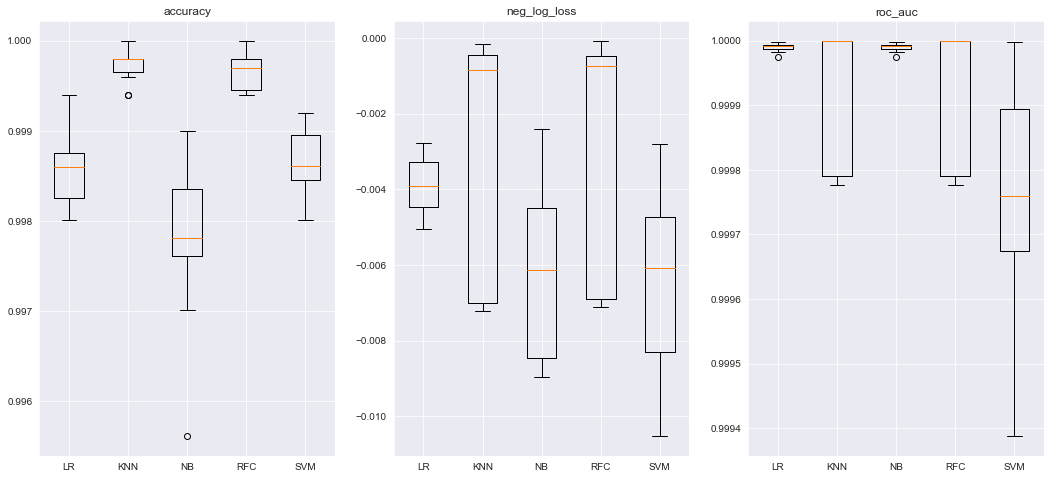

In [56]:
cross_validation(X_feature, y, target, models)

Analizando las tablas resultantes, __el modelo de Regresion Logistica parece ser el mas adecuado__ dado la menor variabilidad que presenta con respecto al resto de modelos. A modo de ejemplo, aunque modelos como los K-Vecinos mas cercanos o un Random Forest Classifier logren una mayor accuracy, la diferencia no es muy significativa (de tan solo unas milesimas si nos fijamos en la escala del eje Y), ademas de presentar una mayor variabilidad en relación al área bajo la curva ROC. Además, si nos fijamos en las matrices de confusión:

In [57]:
# MATRICES DE CONFUSION
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
for name, model in models:
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_pred, Y_test))
    print(confusion_matrix(y_pred, Y_test), "\n")

LR
0.9996014348345954
[[4491    4]
 [   0 5541]] 

KNN
0.9998007174172977
[[4491    2]
 [   0 5543]] 

NB
0.9981068154643284
[[4476    4]
 [  15 5541]] 

RFC
0.9998007174172977
[[4491    2]
 [   0 5543]] 

SVM
0.9998007174172977
[[4489    0]
 [   2 5545]] 

